<a href="https://colab.research.google.com/github/manishvilla7/BAN210/blob/main/Assesment_2_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy import mean
from numpy import std
from numpy import absolute
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv(r'/content/auto-mpg.data'
                , header=None)

# label columns
df.columns = ["mpg", "cylinders", "displacement", "horsepower",
                    "weight", "acceleration", "model_year",
                    "origin", "car_name"]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.drop('car_name',axis=1,inplace=True)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [6]:
for columns in df.columns:
    print(df[columns].value_counts())
    print('')

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 82, dtype: int64

150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: horsepower, Length: 94, dtype: int64

1985.0    4
2130.0    4
2125.0    3
2945.0    3
2265.0    3
         ..
2875.0    1
3102.0    1
3664.0    1
2807.0    1
2625.0    1
Name: weight, Length: 351, dtype: int64

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Length: 95, dtype: int64

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29

In [7]:
df.replace("?", np.nan, inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


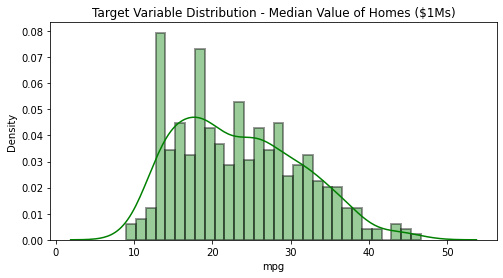

In [10]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df['mpg'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [11]:
#Checking number of unique rows in each feature
features = [i for i in df.columns if i not in ['mpg']]
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


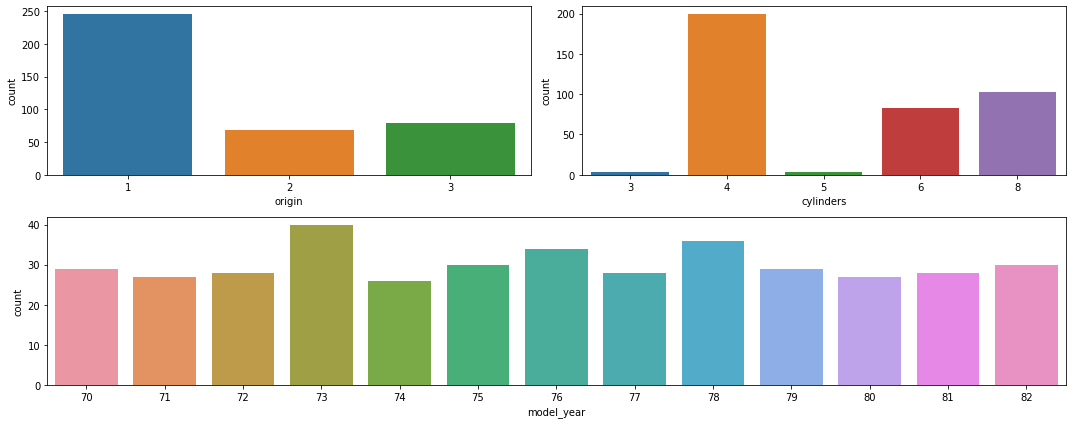

In [12]:
#Visualising the categorical features 
n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])
for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

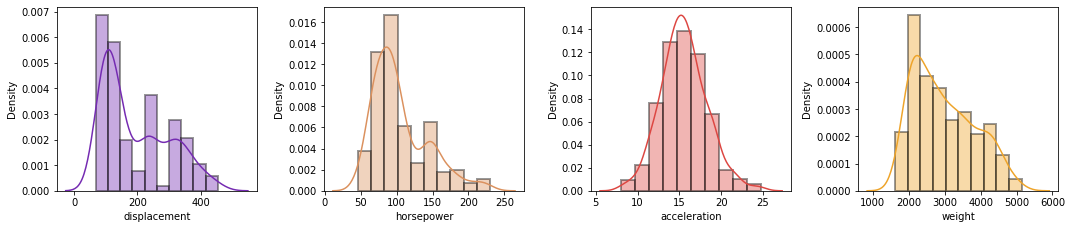

In [13]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4
df = df[~df['horsepower'].isin(['?'])]
df.reset_index(drop=True, inplace=True)
df['horsepower']= df['horsepower'].astype(float)

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

In [14]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [15]:
def preprocess_inputs(df):
    df = df.copy()    
#     df = onehot_encode(df, nominal_feature_dict)
    
    # Split df into X and y
    y = df['mpg'].copy()
    X = df.drop('mpg', axis=1).copy()
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    
    # Scale X_train and X_test with a standard scaler fit only on X_train
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [28]:
results = pd.DataFrame({"model": object(), "R-Square": float()}, index=[])

In [29]:
# Using a simple linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_r2 = linear_model.score(X_test, y_test)
linear_r2=round(linear_r2,3)
results = results.append({"model": "Linear Regression", "R-Square": linear_r2}, ignore_index=True)
results

,model,R-Square
0,Linear Regression,0.782


In [30]:
# Using a decision tree model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_r2 = tree_model.score(X_test, y_test)
tree_r2=round(tree_r2,3)
results = results.append({"model": "Decision Tree", "R-Square": tree_r2}, ignore_index=True)
results.tail(1)


,model,R-Square
1,Decision Tree,0.772


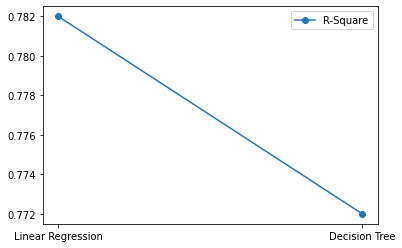

In [20]:
plt.plot(results["model"], results["R-Square"], '-o', label="R-Square")
plt.legend()

In [63]:
X, y = make_classification(n_samples=398, n_features=10)
# cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = DecisionTreeRegressor()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
mean_absolute_error=np.sqrt(mean(absolute(scores)))
mean_absolute_error=round(mean_absolute_error,3)
print("Decision Tree - Root Mean Square Error (RMSE)")
mean_absolute_error

Decision Tree - Root Mean Square Error (RMSE)


0.321

In [32]:
X, y = make_classification(n_samples=398, n_features=10)
# cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
mean_absolute_error=np.sqrt(mean(absolute(scores)))
mean_absolute_error=round(mean_absolute_error,3)
print("Linear Regression - Root Mean Square Error (RMSE)")
mean_absolute_error

Linear Regression - Root Mean Square Error (RMSE)


0.294